In [24]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

root_path = 'gdrive/My Drive/Colab Notebooks/'
print("Path root:", root_path)

Mounted at /content/gdrive
Path root: gdrive/My Drive/Colab Notebooks/


# **Introducing Dependencies**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pyhsical_devices = tf.config.list_physical_devices('GPU')
print('Num GPUs: ', len(pyhsical_devices))

Num GPUs:  1


# **Data Downloading & Preprocessing**


---



In [3]:
# download Cifar-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


170508288/170498071 [==============================] - 14s 0us/step


In [4]:
# print the size of the datasets
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train[0])

# Convert to category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train[0]
y_train_onehot[0]

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[6]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

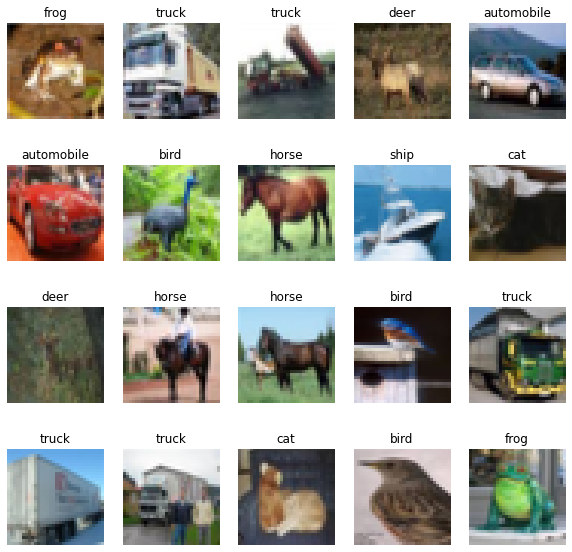

In [5]:
# Create a image tag list
category_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
                 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# show the first N images and their labels
num_images = 20
num_rows = 4
num_cols = 5
plt.figure(figsize=(10,10))
for i in range(num_images):
  #create a figure with N subplots
    plt.subplot(num_rows, num_cols, i+1)
  # show an image
    plt.imshow(x_train[i])
  # show the label
    plt.title(category_dict[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
# Pixel normalization
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

print("Dimension of training data: ", x_train.shape)
print("Dimension of test data: ", x_test.shape)

Dimension of training data:  (50000, 32, 32, 3)
Dimension of test data:  (10000, 32, 32, 3)


In [7]:
def CNN_classification_model(input_size = x_train.shape[1:]):

  model = Sequential()
  # the first block with 2 convolutional layer and 1 maxpooling layer
  '''Conv1 with 32 3*3 kernels
      padding = "same': it applies zero padding to the input image so that input image gets
      fully covered by the filter amd specified stride
      It is called SAME because, for stride 1, the output will be the same as the input.
      output; 32*32*32'''
  model.add(Conv2D(32, (3, 3), padding='same', input_shape = input_size))
  # relu activation function
  model.add(Activation('relu'))
  # Conv2
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))

  # maxpooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=1))

  # the second block
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  # fully connected layer
  model.add(Dense(128))
  model.add(Activation('relu'))
  # dropout layer, every neurons set to 0 with a probability of 0.25
  model.add(Dropout(0.25))

  model.add(Dense(num_classes))
  # map the score of each class into probability
  model.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  return model

model = CNN_classification_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                        

In [8]:
x_train.shape[1:]

(32, 32, 3)

# **Model Training**

---



In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_name = 'final_cifar10.h5'
model_checkpoint = ModelCheckpoint(model_name,
                                   monitor='loss',
                                   verbose=1,
                                   save_best_only=True)

# Load pretrained models
trained_weights_path = 'cifar10_weight.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name=True)

In [10]:
# Train
history = model.fit(x_train, y_train,
                  batch_size = 32,
                  epochs = 10,
                  #validation_split = 0.2,
                  callbacks= [model_checkpoint],
                  verbose = 1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.6163 - accuracy: 0.4111
Epoch 1: loss improved from inf to 1.61627, saving model to final_cifar10.h5
1563/1563 [==============================] - 22s 7ms/step - loss: 1.6163 - accuracy: 0.4111
Epoch 2/10
1560/1563 [============================>.] - ETA: 0s - loss: 1.3116 - accuracy: 0.5322
Epoch 2: loss improved from 1.61627 to 1.31151, saving model to final_cifar10.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3115 - accuracy: 0.5323
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1696 - accuracy: 0.5861
Epoch 3: loss improved from 1.31151 to 1.16956, saving model to final_cifar10.h5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1696 - accuracy: 0.5861
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 1.0628 - accuracy: 0.6292
Epoch 4: loss improved from 1.16956 to 1.06281, saving model to final_cifar10.h5
1563/1563 [=

In [11]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.8433 - accuracy: 0.7119


[0.8433290123939514, 0.711899995803833]

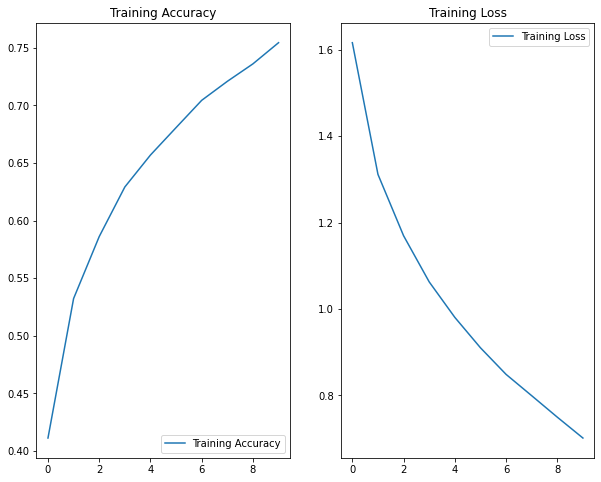

In [13]:
epochs = 10

# get training statistic
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss=history.history['val_loss']

epochs_range = range(epochs)

# plot training result
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.show()

In [14]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')

new_model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.8433 - accuracy: 0.7119


[0.8433290123939514, 0.711899995803833]

Predict on a single image

In [16]:
# output of te posibility of each class
# new_model_predict(x_test[0:1])
prob_each_class = new_model.predict(np.expand_dims(x_test[0], axis=0))
prob_each_class

array([[0.00674773, 0.00186639, 0.01826199, 0.83700174, 0.00123342,
        0.07701532, 0.03014188, 0.00147285, 0.01670681, 0.00955178]],
      dtype=float32)

In [17]:
# output the predicted table
prediction_label = np.argmax(prob_each_class, axis=1)
category_dict[prediction_label[0]]

'cat'

(-0.5, 31.5, 31.5, -0.5)

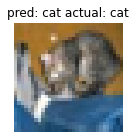

In [18]:
# preview the image
plt.figure(figsize=(2,2))
plt.imshow(x_test[0])
# predict
pred = np.argmax(new_model.predict(x_test[0:1]), axis=-1)
# Display actual and predicted labels of images
plt.title("pred: " + category_dict[pred[0]]+" actual: "+ category_dict[y_test[0][0]])
plt.axis('off')

Plot the first N images in the test set and their coresponding predicted labels

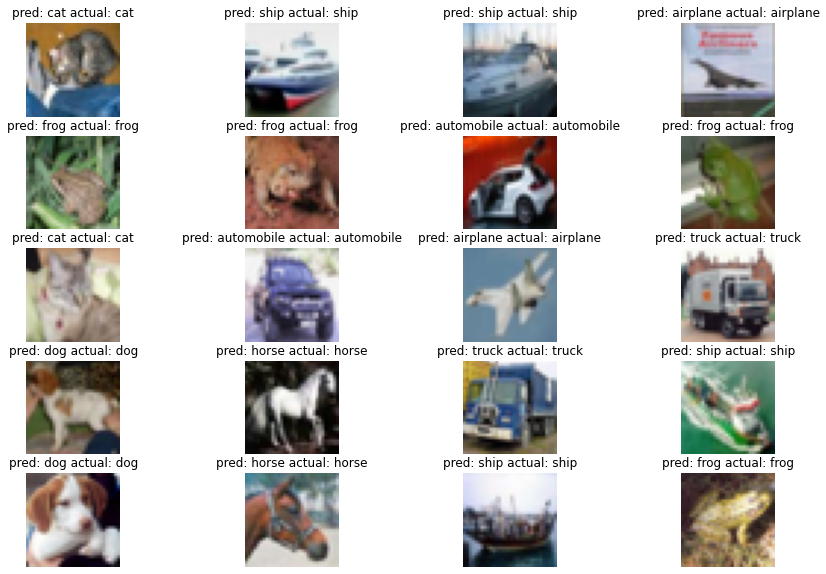

In [19]:
# label list
pred_list = []

# Show the first N images and thei labels
num_images = 20
num_rows = 5
num_cols = 4
plt.figure(figsize=(15,10))
for i in range(num_images):
  #create a figure with N subplots
    plt.subplot(num_rows, num_cols, i+1)
  # plot
    plt.imshow(x_test[i])
  # predict
    pred = np.argmax(new_model.predict(x_test[0:num_images]), axis=-1)
    pred_list.append(pred)
  # show the label
    plt.title("pred: " + category_dict[pred[i]]+" actual: "+ category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()

Perform prediction using the trained model

In [21]:
y_prediction = []
y_actual = []

# one-by-one prediction
prediction_scores = new_model.predict(x_test)
for i in range(prediction_scores.shape[0]):
    score = np.argmax(prediction_scores[i], axis=-1)
    y_prediction.append(score)
    y_actual.append(y_test[i])

y_pred = np.array(y_prediction)
y_act = np.array(y_actual)

# print necessary information
print('Predicted label:')
print(y_pred.flatten())
print('Actual Label:')
print(y_act.flatten())

Predicted label:
[3 8 8 ... 5 1 7]
Actual Label:
[3 8 8 ... 5 1 7]


Print the classification report

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# print classification report
print("Classification report :")
print(classification_report(y_act, y_pred))

# compute the confusion matrix
conf_mat_result = confusion_matrix(y_act, y_pred)

# print confusion matrix
print('Confusion matrix:')
print(conf_mat_result)

Classification report :
              precision    recall  f1-score   support

           0       0.72      0.79      0.76      1000
           1       0.84      0.82      0.83      1000
           2       0.64      0.56      0.60      1000
           3       0.54      0.54      0.54      1000
           4       0.68      0.57      0.62      1000
           5       0.66      0.59      0.63      1000
           6       0.69      0.86      0.76      1000
           7       0.78      0.77      0.77      1000
           8       0.84      0.80      0.82      1000
           9       0.73      0.83      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Confusion matrix:
[[793  20  40  19  10   4  18   6  47  43]
 [ 14 818   7   5   1   1  17   3  19 115]
 [ 78   4 556  68  71  55  92  38  13  25]
 [ 21  10  52 536  61 146  86  33  17  38]
 [ 43   4  79  79 567  27 1

Plot the confussion matrix

In [28]:
import itertools

Plot Classification result


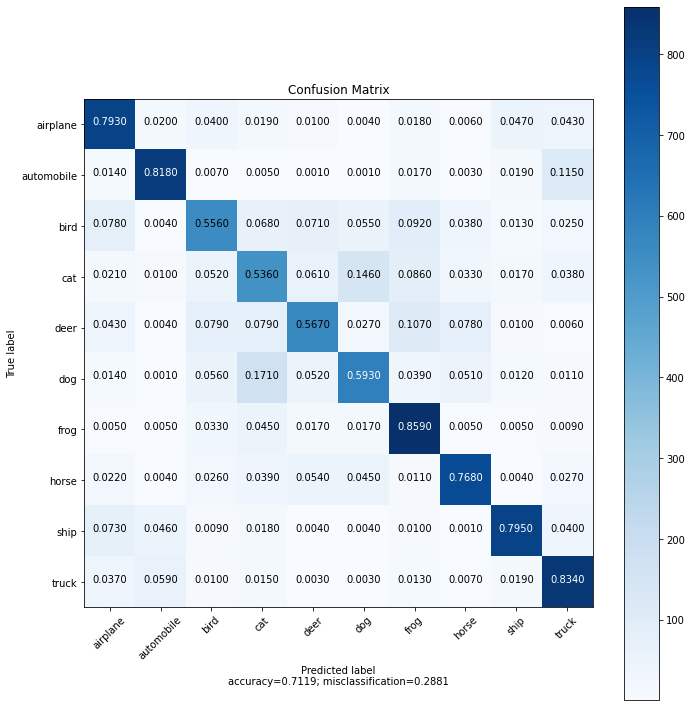

In [34]:
accuracy = np.trace(conf_mat_result) / np.sum(conf_mat_result).astype('float')
misclass = 1 - accuracy

# plot the result
print('Plot Classification result')

# set the label
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
cmap = plt.get_cmap('Blues')

plt.imshow(conf_mat_result, interpolation='nearest', cmap=cmap)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

cm = conf_mat_result.astype('float32') / conf_mat_result.sum(axis=1)[:, np.newaxis]
thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
        horizontalalignment='center',
        color ='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclassification={:0.4f}'.format(accuracy, misclass))
plt.show()

# **EXAMPLE**

Build the model

In [35]:
from tensorflow.keras.layers import BatchNormalization

In [36]:
def CNN_classification_model_tweak(input_size = x_train.shape[1:]):

  model = Sequential()
 
  # the first convolutional block
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = input_size))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  # maxpooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=1))
  model.add(Dropout(0.25))

  # the second convolutional block
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape = input_size))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  # maxpooling
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # the third convolutional block
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape = input_size))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  # maxpooling
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # flatter
  model.add(Flatten())

  # fully connected layer
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.25))

  # last layer
  model.add(Dense(num_classes))
  # map the score of each class into probability
  model.add(Activation('softmax'))

  opt = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  return model

model_custom = CNN_classification_model_tweak()
model_custom.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                      

Training the dataset

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_name = 'custom_cifar10.h5'
model_checkpoint = ModelCheckpoint(model_name,
                                   monitor='val_loss',
                                   save_weight_only = False,
                                   verbose=1,
                                   save_best_only=True)

In [38]:
# Train
history = model_custom.fit(x_train, y_train,
                  batch_size = 32,
                  epochs = 20,
                  validation_split = 0.2,
                  callbacks= [model_checkpoint],
                  verbose = 1)

Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.7831 - accuracy: 0.3573
Epoch 1: val_loss improved from inf to 1.68056, saving model to custom_cifar10.h5
1250/1250 [==============================] - 16s 12ms/step - loss: 1.7831 - accuracy: 0.3573 - val_loss: 1.6806 - val_accuracy: 0.4183
Epoch 2/20
1249/1250 [============================>.] - ETA: 0s - loss: 1.4114 - accuracy: 0.4926
Epoch 2: val_loss improved from 1.68056 to 1.49571, saving model to custom_cifar10.h5
1250/1250 [==============================] - 14s 12ms/step - loss: 1.4113 - accuracy: 0.4926 - val_loss: 1.4957 - val_accuracy: 0.4914
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 1.2291 - accuracy: 0.5617
Epoch 3: val_loss improved from 1.49571 to 1.45282, saving model to custom_cifar10.h5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2291 - accuracy: 0.5617 - val_loss: 1.4528 - val_accuracy: 0.5257
Epoch 4/20
1250/1250 [=========================

Evaluate the model

In [39]:
from tensorflow.keras.models import load_model

new_custom_model = load_model('custom_cifar10.h5')

new_custom_model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.6745 - accuracy: 0.7781


[0.6745337247848511, 0.7781000137329102]

this chapter describe how to build an image classification model based on Tensorflow 2.0 and python. It provides trainees with basic concept of deep learning model building